# Medical Cost Personal Datasets


***In this data analysis project I am considering insurance costs for US residents. After analyzing the data, I will highlight the key factors for the growth and decline of insurance and give conclusions on some plots.***

In [3]:
!pip3 install -U scikit-learn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
pip install pandas


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/Users/vladislavazhilenko/Desktop/insurance.csv')
df[:20]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [12]:
df['age'] = df['age'].astype(float)
df['bmi'] = df['bmi'].astype(float)
df['children'] = df['children'].astype(float)
df['charges'] = df['charges'].astype(float)

In [45]:
minn = df['charges'].min()
maxx = df['charges'].max()
df['normilized_charges'] = df.charges.apply(lambda x: (x-minn)/(maxx-minn))
df['availabiliy of children'] = df.children.apply(lambda x: 'no' if x == 0.0 else 'yes')
df

,age,sex,bmi,children,smoker,region,charges,normilized_charges,availabiliy of children
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.251611,no
1,18.0,male,33.770,1.0,no,southeast,1725.55230,0.009636,yes
2,28.0,male,33.000,3.0,no,southeast,4449.46200,0.053115,yes
3,33.0,male,22.705,0.0,no,northwest,21984.47061,0.333010,no
4,32.0,male,28.880,0.0,no,northwest,3866.85520,0.043816,no
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830,0.151299,yes
1334,18.0,female,31.920,0.0,no,northeast,2205.98080,0.017305,no
1335,18.0,female,36.850,0.0,no,southeast,1629.83350,0.008108,no
1336,21.0,female,25.800,0.0,no,southwest,2007.94500,0.014144,no


***First things first, the table consists of 7 usefull colomns from which we can find age of respondents, their BMI, the amount of children, whether they smoke or not, region and the amount of insurance costs. At this point we should calculate means, medians and standart diviation.***

# Means, medians and STD's

In [47]:
data = df.describe()
drop_l = ['25%', "75%", "count"]
for i in drop_l:
    data = data.drop(i)
data = data.reindex( ["mean",  "50%","std", "max", "min"])
data.index = ["mean", "median", "standard deviation", "max", "min"]
data

,age,bmi,children,charges,normilized_charges
mean,39.207025,30.663397,1.094918,13270.422265,0.193916
median,39.000000,30.400000,1.000000,9382.033000,0.131849
standard deviation,14.049960,6.098187,1.205493,12110.011237,0.193301
max,64.000000,53.130000,5.000000,63770.428010,1.000000
min,18.000000,15.960000,0.000000,1121.873900,0.000000


In [46]:
df.isnull().values.any()
df.isnull().sum()

age                        0
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
normilized_charges         0
availabiliy of children    0
dtype: int64

# Simple charts

### The number of smokers

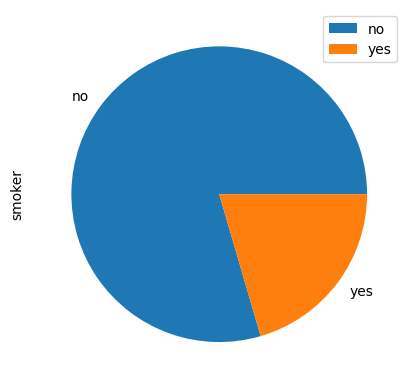

In [15]:
df["smoker"].value_counts().plot.pie()
plt.legend()

***The number of people who smoke is only one-fifth of the total.***

### Let's indicate the frequently encountered number of children in families

(array([574., 324., 240., 157.,  25.,  18.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

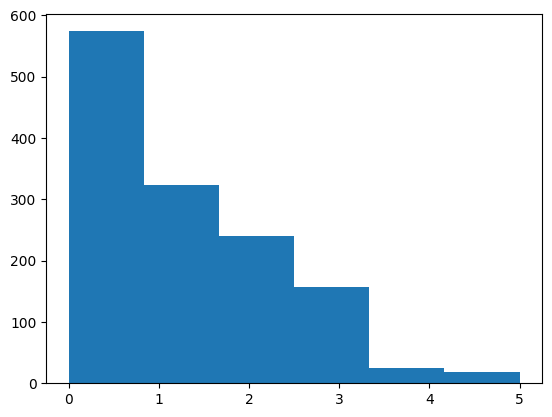

In [51]:
plt.hist(df['children'], bins=6)

***This bar chart shows that the most frequent number of children in a person is 0.***

# Ananlyse of company

### Let's say we are a new insurance company that wants to indicate which group of the population living in which area is most unprofitable.

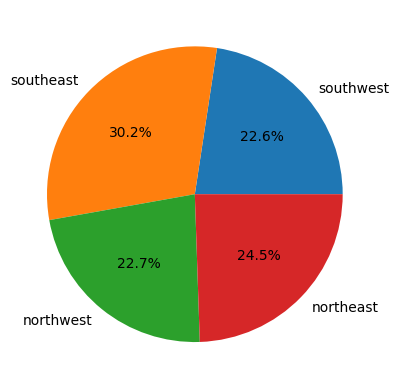

In [17]:
def sumOfRegion(reg):
    curReg = df[df['region'] == reg]
    sumOfCur = curReg['charges'].sum()
    return sumOfCur
    
regions = df['region'].unique()
values = []
for reg in regions:
    values.append(sumOfRegion(reg))
    
    

plt.pie(values, labels = regions, autopct='%1.1f%%')
plt.show()

***From this pie chart, we can indicate that the southeastern district has the largest number of charges.***

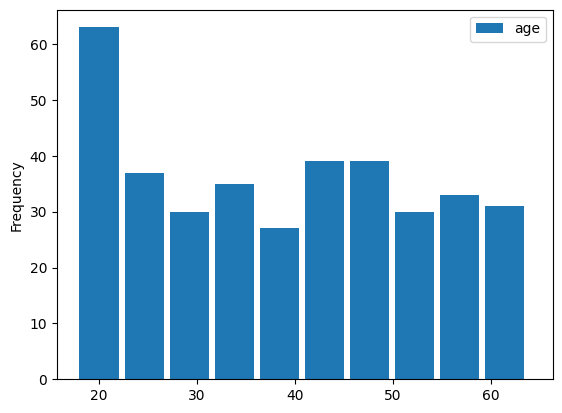

In [18]:
targetReg = df[df['region'] == 'southeast']
targetReg['age'].plot.hist(width = 4)
plt.legend()

***Looking at just ages of region we can't really see the whole picture so lets look at means between ages and figure out which audience is most unprofitable.***

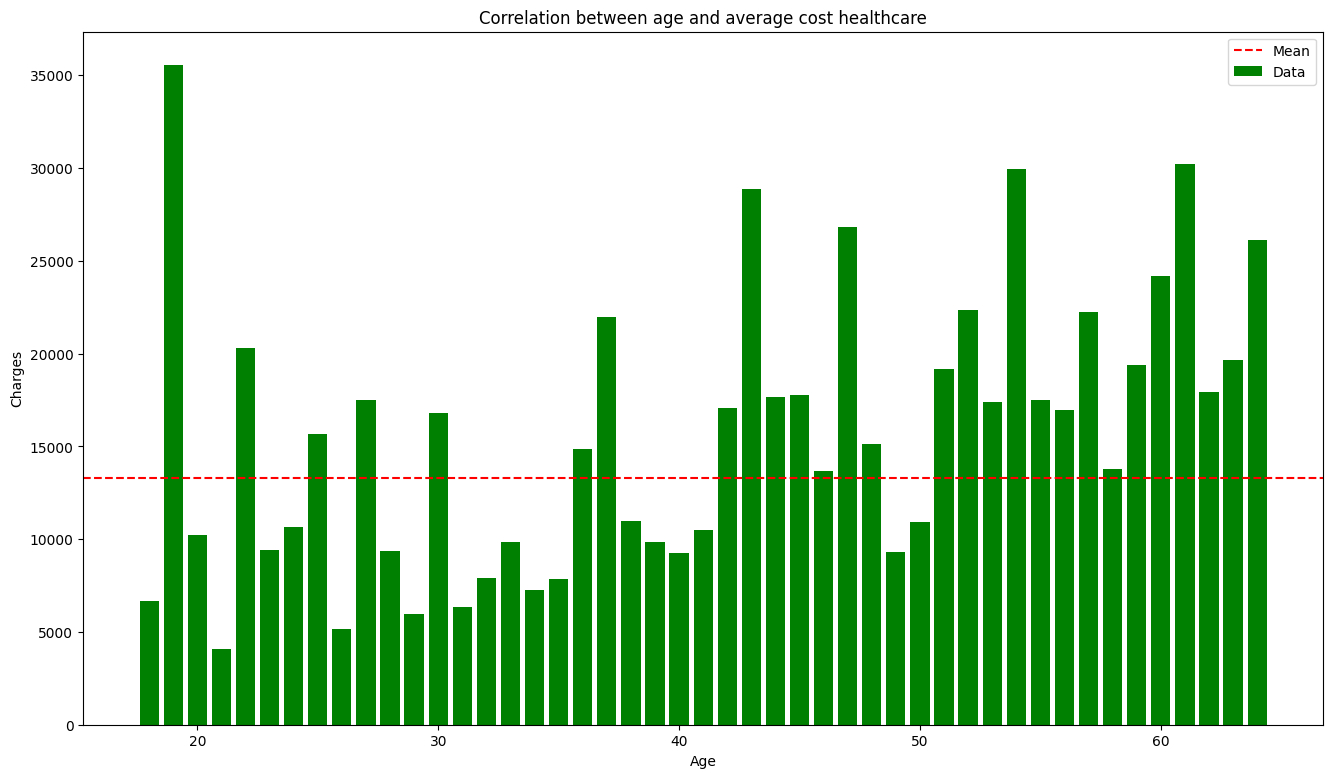

In [19]:
ages = targetReg['age'].unique()

means = {}

for a in ages:
    ageSplit = targetReg[targetReg['age'] == a]
    means[a] = ageSplit['charges'].mean()
    

ind = means.keys()
val = means.values()

plt.figure(figsize=(16,9))
plt.title('Correlation between age and average cost healthcare')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.bar(ind, val, label = 'Data', color = "g")
plt.axhline(df['charges'].mean(), color = "red", label = 'Mean', linestyle='--')
plt.legend()
plt.show()

***From this graph we can indicate that it is an audience of young people.***

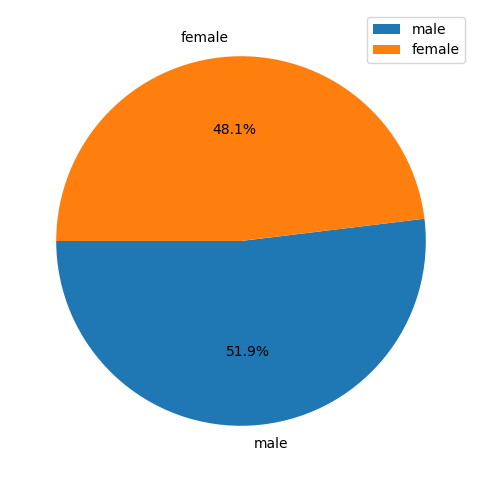

In [20]:
plt.figure(1, figsize=(6,6))
num0 = targetReg['sex'].value_counts()
values = num0.values
plt.pie(values, labels = num0.index, autopct = '%1.1f%%', startangle = 180)
plt.legend()
plt.show()

***This pie chart shows that the number of men and women is approximately equal.***

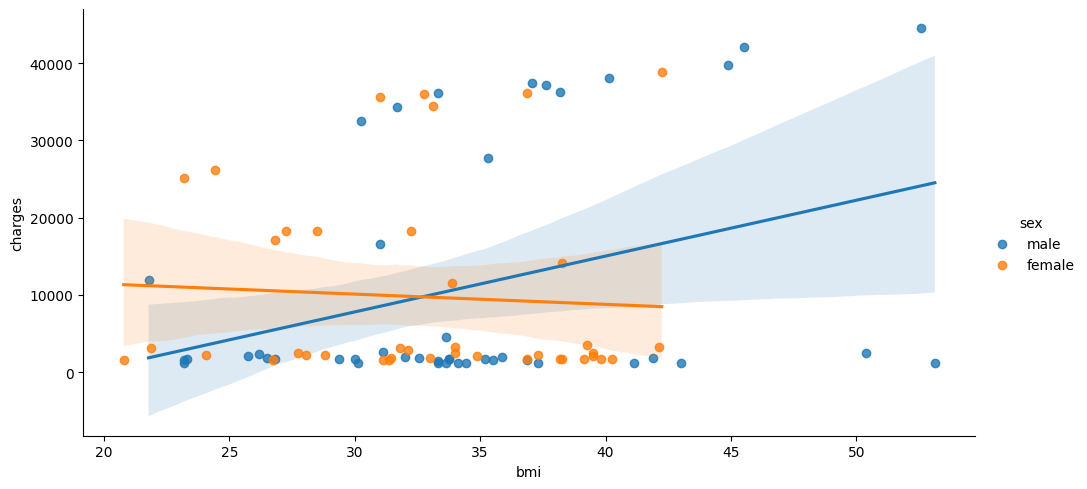

In [28]:
targetYoung = targetReg[targetReg['age'] <= 25] 
sns.lmplot(data = targetYoung, x = "bmi", y = "charges", hue = "sex", aspect = 2)

***With the growth of the body mass index, the largest amount of insurance charges is provided to men at a young age***

### Conclusion

*Our goal was to indicate the target audience and their living area which is most unprofitable.*

*FIrst of all, we notice that the number of smokers is really small, therefore, we do not take into account the dependence of payments on smoking, since a larger percentage of respondents do not smoke.*

*Moreover, we note that most do not have children, so we will also not focus on this parameter.*

*Starting the analysis by identifying the area to which the insurance company pays the most money, we came to the conclusion that this is the southeast district.*

*Next, considering only residents of the southeastern district, the graph showed that young people receive more insurance payments than older people in comparison with the median value.*

*Finally, having determined on a simple graph that the number of men and women is about the same, we analyzed the relationship of the body mass index with the number of charges by gender. The increase in payments with an increase in body mass index among men is more dramatic.*

*To summarize, цe determined that the insurance company deducts the largest number of payments in the southeastern region to young men with an increased body mass index.*